In [3]:
library(dplyr)
library("ggpubr")
samples<-read.csv("./named/y_cruncher_16*c4.large_25m10runs_reverse_labeled.csv")

# 1.analyze set by set
### 1.1 description:
set 1 contains 160 entrys generated from VM 1~16<br>
set 2 contains 150 entrys generated from VM 2~16<br>
.
.
.<br>
set 16 contains 10 entrys generated from VM 16<br>

each entry present 25,000,000digits*10runs of y-cruncher<br>

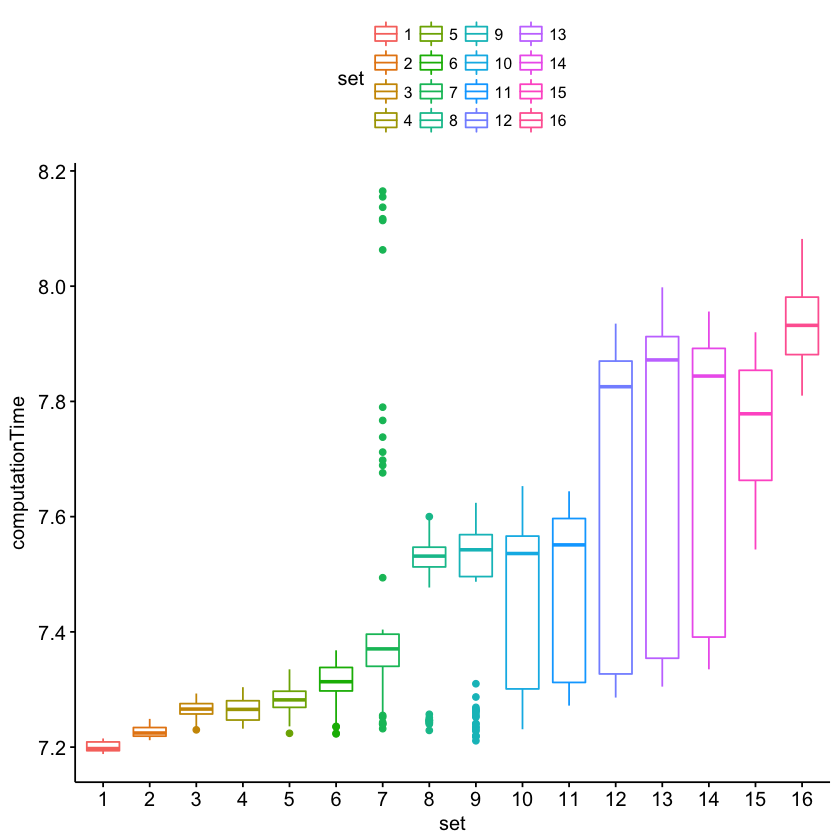

In [23]:
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set")

#,facet.by='vmID'

## we would say that resource provision is not even

### 1.2 calculations on each set 

In [5]:
statistic_result=data.frame()
for(i in 1:16){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
7.188,7.215,7.200200,7.1975,9.351111e-05,1
7.212,7.249,7.227150,7.2245,9.013421e-05,2
7.230,7.293,7.265267,7.2660,1.926161e-04,3
7.232,7.304,7.264500,7.2655,3.591795e-04,4
7.224,7.335,7.283320,7.2820,5.769159e-04,5
7.223,7.368,7.310433,7.3135,1.429436e-03,6
7.232,8.165,7.453886,7.3705,5.776990e-02,7
7.229,7.600,7.499388,7.5315,9.843278e-03,8
7.211,7.624,7.485822,7.5425,1.729878e-02,9
7.231,7.653,7.472290,7.5360,1.818382e-02,10


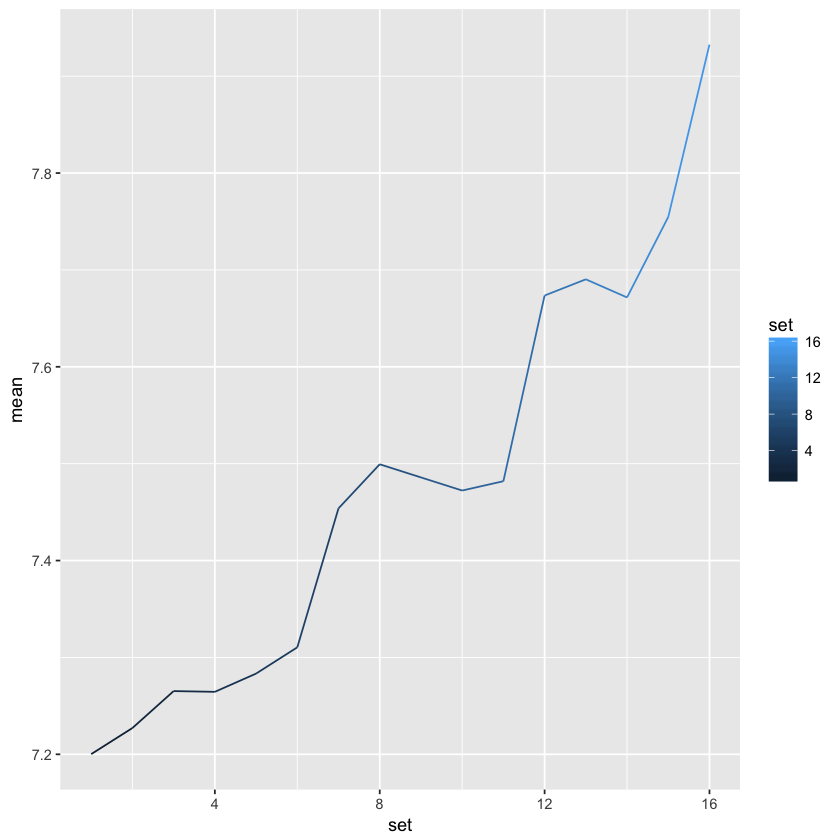

In [6]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()

### 1.3 percentile

In [7]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,7.2679
20%,7.3080
30%,7.3540
40%,7.5120
50%,7.5620
60%,7.6404
70%,7.8343
80%,7.8800
90%,7.9261
100%,8.1650


In [8]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
q

,computationTime,percentile
10%,7.2679,0.1
20%,7.3080,0.2
30%,7.3540,0.3
40%,7.5120,0.4
50%,7.5620,0.5
60%,7.6404,0.6
70%,7.8343,0.7
80%,7.8800,0.8
90%,7.9261,0.9
100%,8.1650,1.0


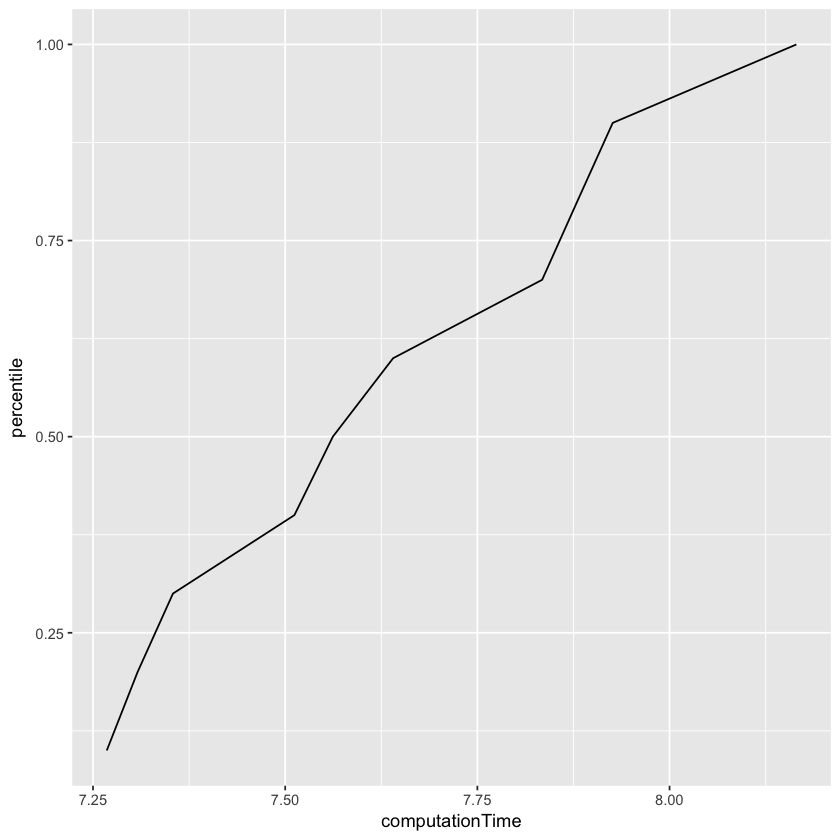

In [9]:
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()

# 2. Another perspective - VM dimension 

### 2.1 VM No.16

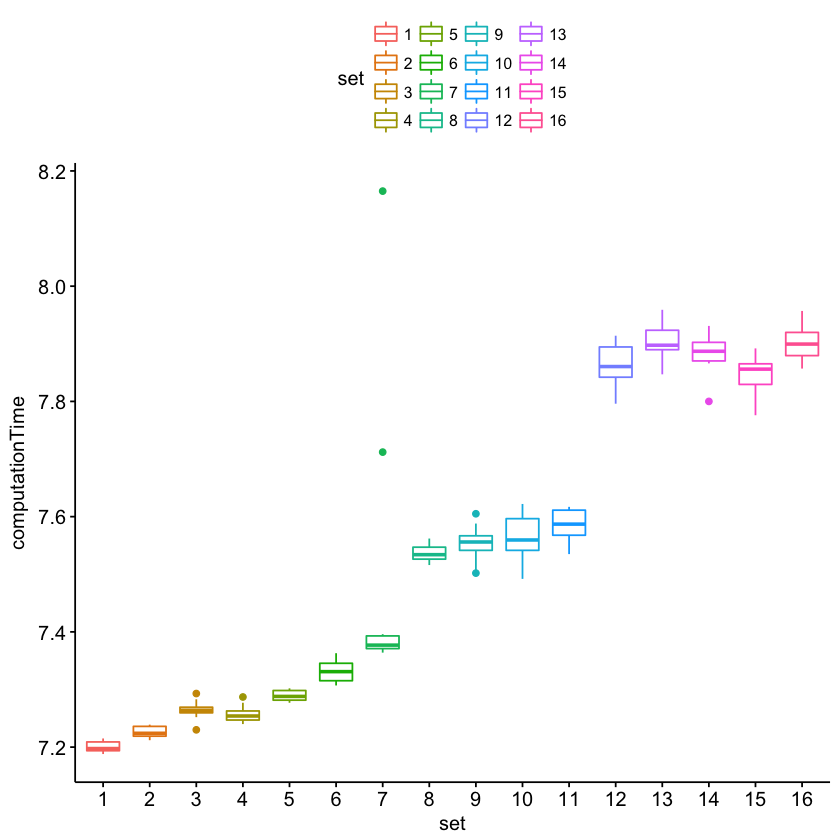

In [10]:
samples<-samples[samples$vmID==16,]
ggboxplot(samples, x = "set", y = "computationTime", 
          color = "set", 
          ylab = "computationTime", xlab = "set")

#### 2.1.1 statistic_result of VM No.16

In [11]:
statistic_result=data.frame()
for(i in 1:16){
    set=samples[samples$set==i,'computationTime']
    statistic_result=rbind(statistic_result,c(range(set),mean(set),median(set),var(set),i))
}
names(statistic_result)<-c('min','max','mean','median','var','set')
statistic_result

min,max,mean,median,var,set
7.188,7.215,7.2002,7.1975,9.351111e-05,1
7.212,7.239,7.2262,7.2240,9.240000e-05,2
7.230,7.293,7.2643,7.2640,2.875667e-04,3
7.240,7.287,7.2577,7.2540,2.224556e-04,4
7.277,7.302,7.2891,7.2880,9.965556e-05,5
7.307,7.363,7.3312,7.3310,3.406222e-04,6
7.364,8.165,7.4888,7.3770,6.765351e-02,7
7.516,7.562,7.5368,7.5340,2.112889e-04,8
7.502,7.605,7.5529,7.5560,1.044767e-03,9
7.492,7.622,7.5646,7.5595,1.626933e-03,10


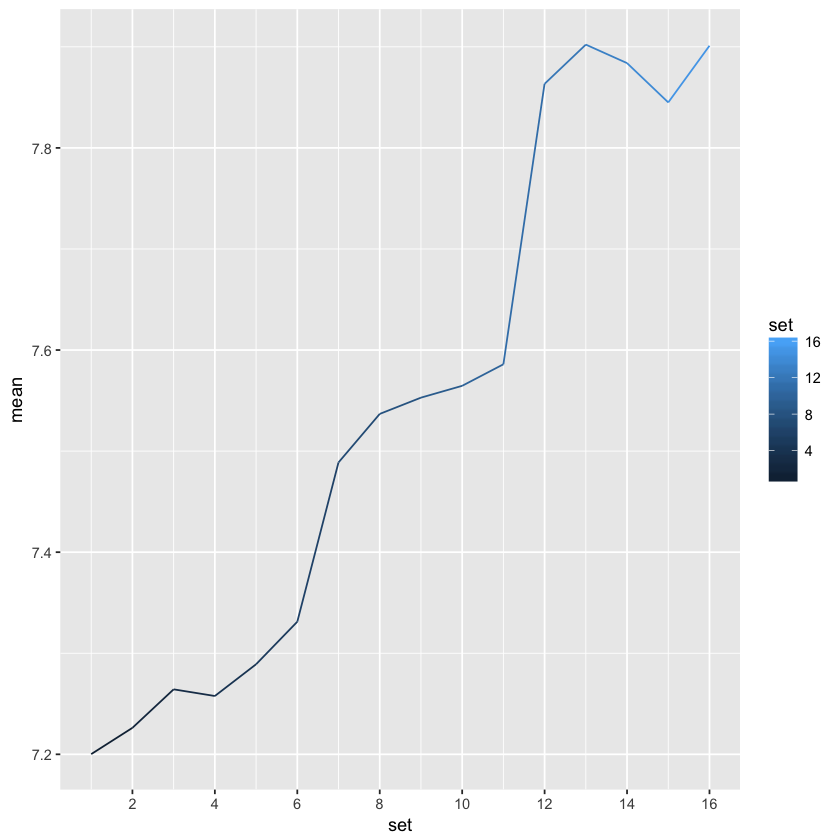

In [12]:
ggplot(statistic_result, aes(x = set, y = mean, colour = set)) +
geom_line()+
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))


#### 2.1.2 percentile of VM No.16

In [13]:
q=data.frame(quantile(samples$computationTime,c((1:10)/10)))
names(q)<-c('computationTime')
q

,computationTime
10%,7.2296
20%,7.2628
30%,7.3014
40%,7.3728
50%,7.5410
60%,7.5700
70%,7.8018
80%,7.8672
90%,7.8994
100%,8.1650


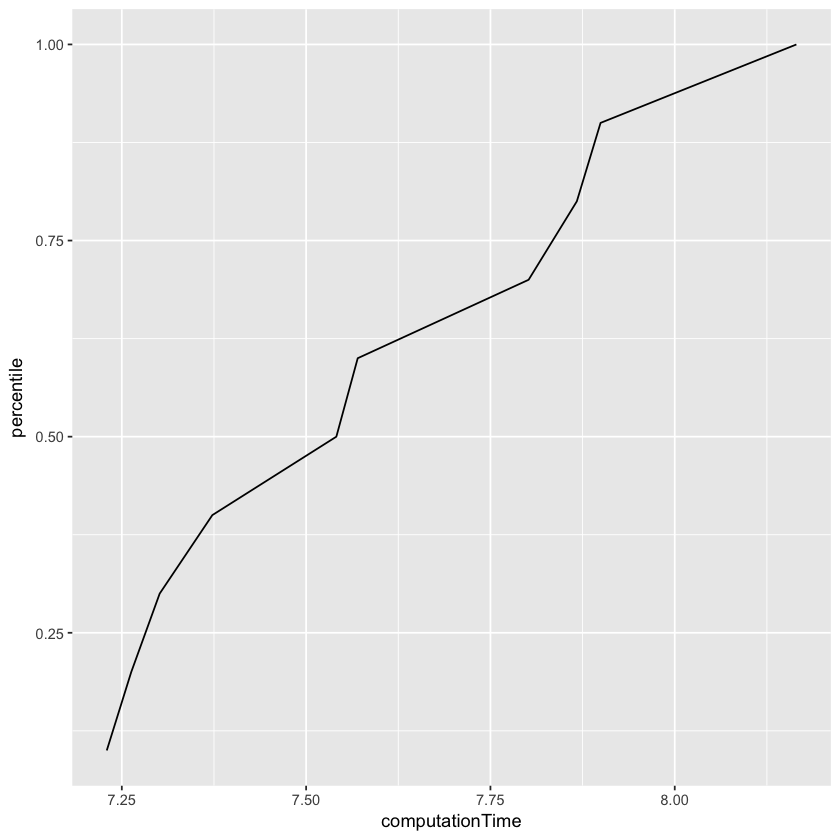

In [14]:
p<-data.frame(c((1:10)/10))
names(p)<-c('percentile')
q<-cbind(q,p)
ggplot(q, aes(x =computationTime , y=percentile)) +
  geom_line()

In [18]:
samples<-read.csv("./named/y_cruncher_16*c4.large_25m10runs_reverse_labeled.csv")
library(dplyr)
library("ggpubr")

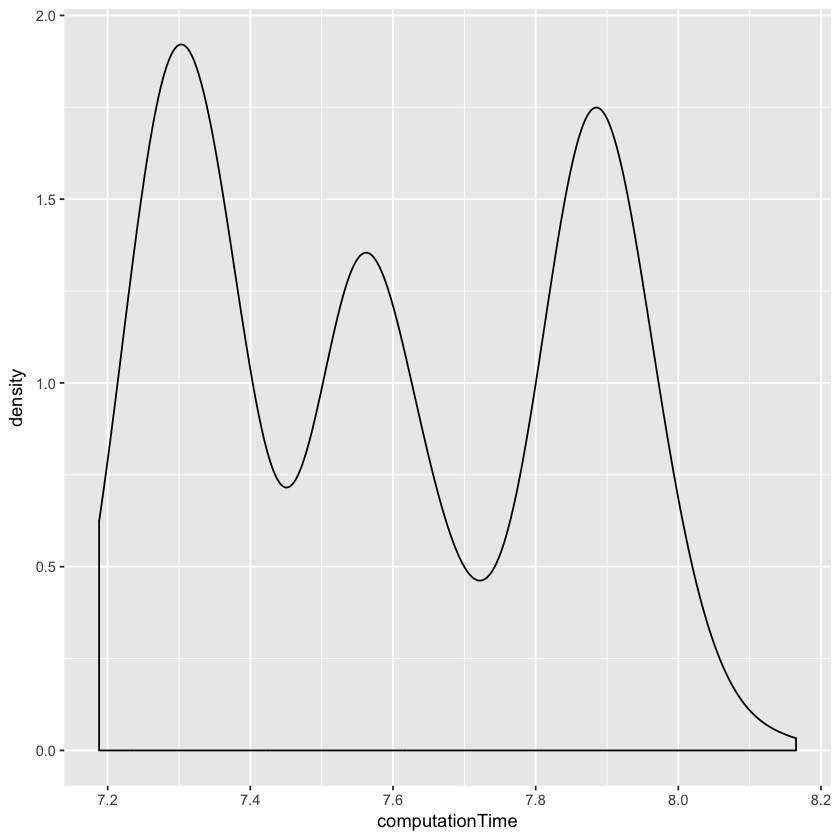

In [19]:
ggplot(samples, aes(x = computationTime))+
geom_density(alpha = 0.3)

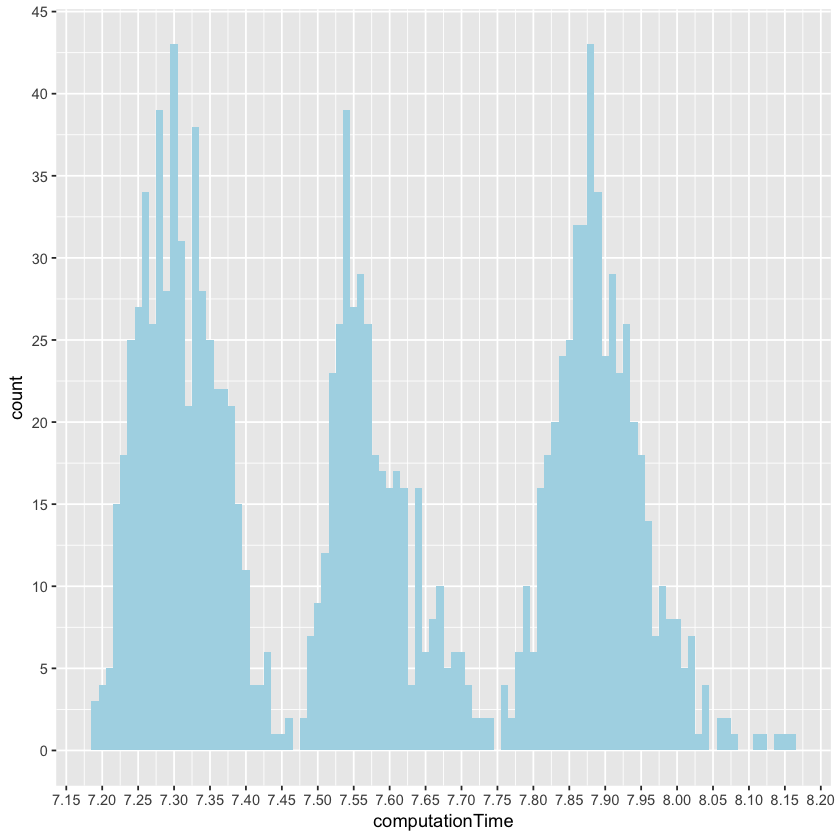

In [21]:
ggplot(samples, aes(x = computationTime)) +
  geom_histogram(binwidth = 0.01, fill = "lightblue",)+
scale_x_continuous(breaks = scales::pretty_breaks(n = 20)) +
scale_y_continuous(breaks = scales::pretty_breaks(n = 10))
    #scale_x_continuous(breaks = round(seq(min(samples$computationTime), max(samples$computationTime), by = 0.3),1))

## we still find gaps

In [1]:
ggplot(samples, aes(x = computationTime)) +
  geom_histogram(binwidth = 0.01, fill = "lightblue",)+
scale_x_continuous(breaks = scales::pretty_breaks(n = 20)) +
scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

ERROR: Error in ggplot(samples, aes(x = computationTime)): could not find function "ggplot"
